## Import Library & Cek Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')
!pip install nlpaug
!pip install --upgrade gensim
!pip install pickle-mixin
import tensorflow as tf
import nlpaug.augmenter.word as naw
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import KFold
import numpy as np
from gensim.models import Word2Vec
import pickle

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 26.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5990 sha256=6692dad143903d5d1e28e66fc6eb36cd13a9624edfd7cadebb8e2338e3a53e41
  Stored in directory: /root/.cache/pip/wheels/3e/c6/e9/d1b0a34e1efc6c3ec9c086623972c6de6317faddb2af0a619c
Successfully built pickle-mixin


In [2]:
df = pd.read_csv("/content/drive/MyDrive/dataset capstone/databaru.csv")
df.head()

,Tempat laundry dengan teknologi tinggi dan ditangani oleh tenaga profesional memberi jaminan kepuasan kepada para customer,1
0,Hasilnya sangat bagus dan memuaskan,1
1,Hasil laundry bagus dan wangi,1
2,Kurang bersih kadang nyucinya,0
3,Pekerjaannya tidak tepat waktu,0
4,Beberapa baju kena pemutih spertinya jadi agak...,0


In [3]:
df.dtypes

Tempat laundry dengan teknologi tinggi dan ditangani oleh tenaga profesional memberi jaminan kepuasan kepada para customer    object
1                                                                                                                              int64
dtype: object

In [4]:
df.columns= ["text", "target"]

<Axes: >

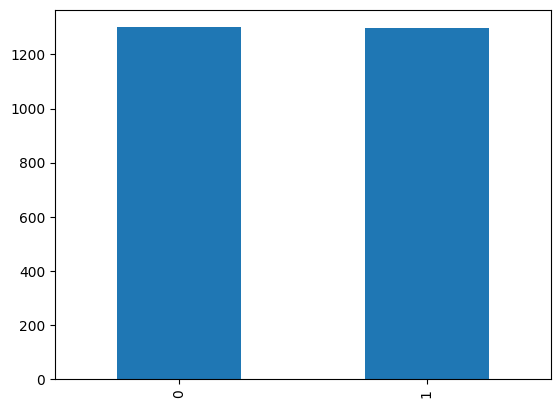

In [5]:
df["target"].value_counts().plot(kind="bar")

## Preprocessing

### Case Folding

In [6]:
print(df)

                                                   text  target
0                   Hasilnya sangat bagus dan memuaskan       1
1                         Hasil laundry bagus dan wangi       1
2                         Kurang bersih kadang nyucinya       0
3                        Pekerjaannya tidak tepat waktu       0
4     Beberapa baju kena pemutih spertinya jadi agak...       0
...                                                 ...     ...
2594  Pakaian saya selalu dijaga agar tetap awet dan...       1
2595  Laundry ini memiliki tim yang terampil dan ber...       1
2596  Mereka memberikan layanan penanganan noda yang...       1
2597  Layanan pengeringan mereka dilakukan dengan ha...       1
2598  Saya merasa sangat nyaman menggunakan layanan ...       1

[2599 rows x 2 columns]


In [7]:
import re

In [8]:
#Mengubah menjadi huruf kecil semua
df['text'] = df['text'].apply(lambda x: x.lower())
print(df)

                                                   text  target
0                   hasilnya sangat bagus dan memuaskan       1
1                         hasil laundry bagus dan wangi       1
2                         kurang bersih kadang nyucinya       0
3                        pekerjaannya tidak tepat waktu       0
4     beberapa baju kena pemutih spertinya jadi agak...       0
...                                                 ...     ...
2594  pakaian saya selalu dijaga agar tetap awet dan...       1
2595  laundry ini memiliki tim yang terampil dan ber...       1
2596  mereka memberikan layanan penanganan noda yang...       1
2597  layanan pengeringan mereka dilakukan dengan ha...       1
2598  saya merasa sangat nyaman menggunakan layanan ...       1

[2599 rows x 2 columns]


### Data Cleaning

In [9]:
#menghapus karakter dan tanda baca yang tidak diinginkan
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
print(df)

                                                   text  target
0                   hasilnya sangat bagus dan memuaskan       1
1                         hasil laundry bagus dan wangi       1
2                         kurang bersih kadang nyucinya       0
3                        pekerjaannya tidak tepat waktu       0
4     beberapa baju kena pemutih spertinya jadi agak...       0
...                                                 ...     ...
2594  pakaian saya selalu dijaga agar tetap awet dan...       1
2595  laundry ini memiliki tim yang terampil dan ber...       1
2596  mereka memberikan layanan penanganan noda yang...       1
2597  layanan pengeringan mereka dilakukan dengan ha...       1
2598  saya merasa sangat nyaman menggunakan layanan ...       1

[2599 rows x 2 columns]


In [10]:
df.loc[40, 'text']

'cepat bersih respon baik terima kasih'

In [11]:
#menghapus spasi berlebih
df['text'] = df['text'].str.replace(r'\s+', ' ')

<ipython-input-11-643fac20faa4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'\s+', ' ')


In [12]:
df.loc[40, 'text']

'cepat bersih respon baik terima kasih'

### N-Gram

In [13]:
print(df)

                                                   text  target
0                   hasilnya sangat bagus dan memuaskan       1
1                         hasil laundry bagus dan wangi       1
2                         kurang bersih kadang nyucinya       0
3                        pekerjaannya tidak tepat waktu       0
4     beberapa baju kena pemutih spertinya jadi agak...       0
...                                                 ...     ...
2594  pakaian saya selalu dijaga agar tetap awet dan...       1
2595  laundry ini memiliki tim yang terampil dan ber...       1
2596  mereka memberikan layanan penanganan noda yang...       1
2597  layanan pengeringan mereka dilakukan dengan ha...       1
2598  saya merasa sangat nyaman menggunakan layanan ...       1

[2599 rows x 2 columns]


In [14]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

In [16]:
# Menggabungkan kata-kata penting dengan kata-kata yang mengikuti menggunakan teknik N-gram
def combine_important_words(tokens):
    combined_tokens = []
    skip_next = False
    for i in range(len(tokens) - 1):
        if skip_next:
            skip_next = False
            continue
        if tokens[i] in ['tidak', 'kurang', 'gak', 'sangat', 'banget', 'kadang', 'terlalu','yg','gk']:
            combined_tokens.append(tokens[i] + '_' + tokens[i+1])
            skip_next = True
        else:
            combined_tokens.append(tokens[i])
    if not skip_next:
        combined_tokens.append(tokens[-1])
    return combined_tokens

df['Tokens'] = df['text'].apply(word_tokenize)
df['Combined_Tokens'] = df['Tokens'].apply(combine_important_words)

print(df)

                                                   text  target  \
0                   hasilnya sangat bagus dan memuaskan       1   
1                         hasil laundry bagus dan wangi       1   
2                         kurang bersih kadang nyucinya       0   
3                        pekerjaannya tidak tepat waktu       0   
4     beberapa baju kena pemutih spertinya jadi agak...       0   
...                                                 ...     ...   
2594  pakaian saya selalu dijaga agar tetap awet dan...       1   
2595  laundry ini memiliki tim yang terampil dan ber...       1   
2596  mereka memberikan layanan penanganan noda yang...       1   
2597  layanan pengeringan mereka dilakukan dengan ha...       1   
2598  saya merasa sangat nyaman menggunakan layanan ...       1   

                                                 Tokens  \
0             [hasilnya, sangat, bagus, dan, memuaskan]   
1                   [hasil, laundry, bagus, dan, wangi]   
2                 

### Stopword Removal

In [17]:
df.head()

,text,target,Tokens,Combined_Tokens
0,hasilnya sangat bagus dan memuaskan,1,"[hasilnya, sangat, bagus, dan, memuaskan]","[hasilnya, sangat_bagus, dan, memuaskan]"
1,hasil laundry bagus dan wangi,1,"[hasil, laundry, bagus, dan, wangi]","[hasil, laundry, bagus, dan, wangi]"
2,kurang bersih kadang nyucinya,0,"[kurang, bersih, kadang, nyucinya]","[kurang_bersih, kadang_nyucinya]"
3,pekerjaannya tidak tepat waktu,0,"[pekerjaannya, tidak, tepat, waktu]","[pekerjaannya, tidak_tepat, waktu]"
4,beberapa baju kena pemutih spertinya jadi agak...,0,"[beberapa, baju, kena, pemutih, spertinya, jad...","[beberapa, baju, kena, pemutih, spertinya, jad..."


In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
stopwords_ind = stopwords.words('indonesian')
df['Clean_Tokens'] = df['Combined_Tokens'].apply(lambda x: [word for word in x if word.lower() not in stopwords_ind])

# Mengembalikan teks review dari N-gram yang telah dihapus stopword
df['clean_text'] = df['Clean_Tokens'].apply(lambda x: ' '.join(x))

print(df)

                                                   text  target  \
0                   hasilnya sangat bagus dan memuaskan       1   
1                         hasil laundry bagus dan wangi       1   
2                         kurang bersih kadang nyucinya       0   
3                        pekerjaannya tidak tepat waktu       0   
4     beberapa baju kena pemutih spertinya jadi agak...       0   
...                                                 ...     ...   
2594  pakaian saya selalu dijaga agar tetap awet dan...       1   
2595  laundry ini memiliki tim yang terampil dan ber...       1   
2596  mereka memberikan layanan penanganan noda yang...       1   
2597  layanan pengeringan mereka dilakukan dengan ha...       1   
2598  saya merasa sangat nyaman menggunakan layanan ...       1   

                                                 Tokens  \
0             [hasilnya, sangat, bagus, dan, memuaskan]   
1                   [hasil, laundry, bagus, dan, wangi]   
2                 

In [20]:
df.head()

,text,target,Tokens,Combined_Tokens,Clean_Tokens,clean_text
0,hasilnya sangat bagus dan memuaskan,1,"[hasilnya, sangat, bagus, dan, memuaskan]","[hasilnya, sangat_bagus, dan, memuaskan]","[hasilnya, sangat_bagus, memuaskan]",hasilnya sangat_bagus memuaskan
1,hasil laundry bagus dan wangi,1,"[hasil, laundry, bagus, dan, wangi]","[hasil, laundry, bagus, dan, wangi]","[hasil, laundry, bagus, wangi]",hasil laundry bagus wangi
2,kurang bersih kadang nyucinya,0,"[kurang, bersih, kadang, nyucinya]","[kurang_bersih, kadang_nyucinya]","[kurang_bersih, kadang_nyucinya]",kurang_bersih kadang_nyucinya
3,pekerjaannya tidak tepat waktu,0,"[pekerjaannya, tidak, tepat, waktu]","[pekerjaannya, tidak_tepat, waktu]","[pekerjaannya, tidak_tepat]",pekerjaannya tidak_tepat
4,beberapa baju kena pemutih spertinya jadi agak...,0,"[beberapa, baju, kena, pemutih, spertinya, jad...","[beberapa, baju, kena, pemutih, spertinya, jad...","[baju, kena, pemutih, spertinya, luntur]",baju kena pemutih spertinya luntur


In [21]:
df.tail()

,text,target,Tokens,Combined_Tokens,Clean_Tokens,clean_text
2594,pakaian saya selalu dijaga agar tetap awet dan...,1,"[pakaian, saya, selalu, dijaga, agar, tetap, a...","[pakaian, saya, selalu, dijaga, agar, tetap, a...","[pakaian, dijaga, awet, tahan, perlindungan, t...",pakaian dijaga awet tahan perlindungan tambahan
2595,laundry ini memiliki tim yang terampil dan ber...,1,"[laundry, ini, memiliki, tim, yang, terampil, ...","[laundry, ini, memiliki, tim, yang, terampil, ...","[laundry, memiliki, tim, terampil, berpengalam...",laundry memiliki tim terampil berpengalaman me...
2596,mereka memberikan layanan penanganan noda yang...,1,"[mereka, memberikan, layanan, penanganan, noda...","[mereka, memberikan, layanan, penanganan, noda...","[layanan, penanganan, noda, efektif, menghilan...",layanan penanganan noda efektif menghilangkan ...
2597,layanan pengeringan mereka dilakukan dengan ha...,1,"[layanan, pengeringan, mereka, dilakukan, deng...","[layanan, pengeringan, mereka, dilakukan, deng...","[layanan, pengeringan, hatihati, menjaga, kele...",layanan pengeringan hatihati menjaga kelembuta...
2598,saya merasa sangat nyaman menggunakan layanan ...,1,"[saya, merasa, sangat, nyaman, menggunakan, la...","[saya, merasa, sangat_nyaman, menggunakan, lay...","[sangat_nyaman, layanan, laundry, hasil, memua...",sangat_nyaman layanan laundry hasil memuaskan


### Splitting Dataset

In [22]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan label target
X = df['clean_text']
y = df['target']

# Memisahkan dataset menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Mengecek apakah balance

<Axes: >

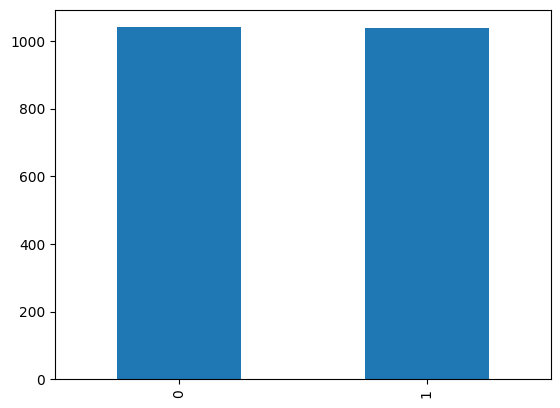

In [23]:
y_train.value_counts().plot(kind="bar")

<Axes: >

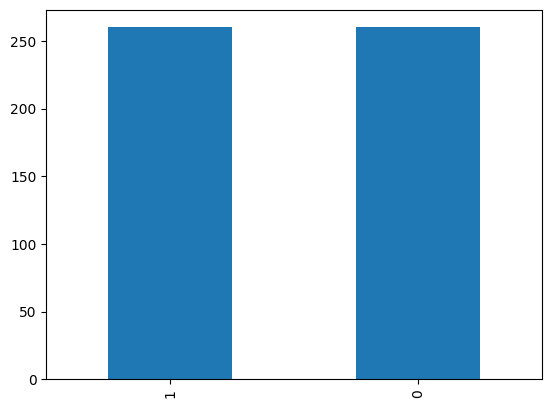

In [24]:
y_test.value_counts().plot(kind="bar")

### Analisis & Membangun Model

In [25]:
aug = naw.SynonymAug(aug_src='wordnet')
augmented_X_train = []
for text in X_train:
    augmented_text = aug.augment(text)
    augmented_X_train.append(augmented_text)
X_train = np.concatenate((X_train, np.array(augmented_X_train)), axis=0)
y_train = np.concatenate((y_train, y_train), axis=0)


# Vektorisasi teks
tokenizer = Tokenizer(num_words=10000,oov_token = "<OOV>")  # Jumlah kata unik yang akan digunakan
tokenizer.fit_on_texts(X_train)  # X_train adalah data teks review pada training set


X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

max_length = 100  # Panjang maksimum teks review yang akan diproses
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
<ipython-input-25-0366cf5731da>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.concatenate((X_train, np.array(augmented_X_train)), axis=0)


In [26]:
# Menyimpan tokenizer
with open('tokenlast.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

In [27]:
# Pembangunan model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])





In [28]:
kfold = KFold(n_splits=2)
for train_idx, val_idx in kfold.split(X_train):
    X_train_fold, X_val = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val = y_train[train_idx], y_train[val_idx]

    # Pelatihan model
    epochs = 50  # Jumlah epoch (iterasi) yang akan dilakukan
    batch_size = 32  # Ukuran batch yang digunakan saat pelatihan

    history = model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

# Evaluasi model
loss, accuracy = model.evaluate(X_val, y_val)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/50
65/65 [==============================] - 11s 36ms/step - loss: 0.6935 - accuracy: 0.4829 - val_loss: 0.6931 - val_accuracy: 0.5002
Epoch 2/50
65/65 [==============================] - 1s 17ms/step - loss: 0.6931 - accuracy: 0.5166 - val_loss: 0.6930 - val_accuracy: 0.5002
Epoch 3/50
65/65 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.5041 - val_loss: 0.6930 - val_accuracy: 0.5012
Epoch 4/50
65/65 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.4954 - val_loss: 0.6931 - val_accuracy: 0.5002
Epoch 5/50
65/65 [==============================] - 1s 13ms/step - loss: 0.6935 - accuracy: 0.4820 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 6/50
65/65 [==============================] - 1s 14ms/step - loss: 0.6935 - accuracy: 0.4656 - val_loss: 0.6931 - val_accuracy: 0.5002
Epoch 7/50
65/65 [==============================] - 1s 15ms/step - loss: 0.6934 - accuracy: 0.4959 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 8/50
6

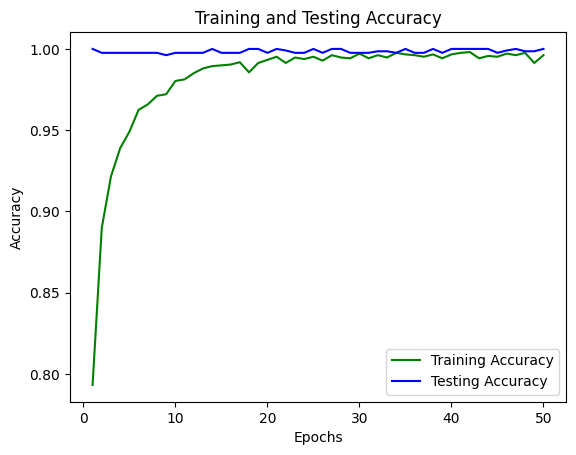

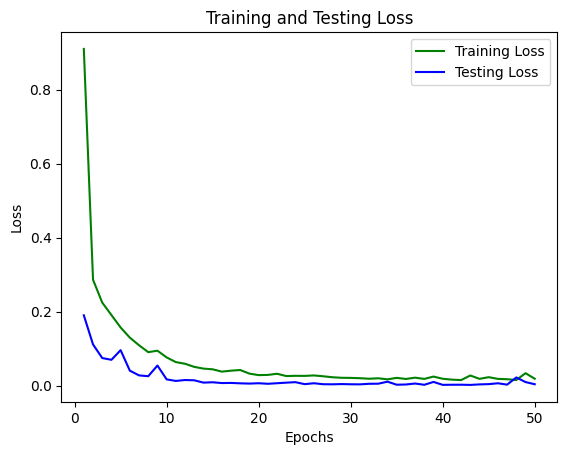

In [29]:
# Memplot akurasi dan loss pada setiap epoch
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_accuracy) + 1)

# Plot akurasi
plt.plot(epochs, train_accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Model Testing

In [30]:
sequence = tokenizer.texts_to_sequences(['Laundry sangat bagus kerja bersih'])
print(sequence)
sequence = pad_sequences(sequence, maxlen=100)
prediction = model.predict(sequence)
print(prediction)

[[5, 6, 11, 71, 7]]
1/1 [==============================] - 0s 134ms/step
[[0.99999785]]


In [31]:
model.save('finalmodel.h5')

In [35]:
sequence = tokenizer.texts_to_sequences(['Laundry tidak bagus pakaian masih kotor'])
print(sequence)
sequence = pad_sequences(sequence, maxlen=100)
prediction = model.predict(sequence)

sentiment = int(np.argmax(prediction))
probability = max(prediction.tolist()[0])
print(probability)
print(prediction)
if prediction > 0.5:
  print("sangat bagus")
else :
  print("sangat buruk")

[[5, 2, 11, 4, 1, 44]]
1/1 [==============================] - 0s 34ms/step
0.12318197637796402
[[0.12318198]]
sangat buruk
